# Data Analysis
## Emotion Push
Emotion Push dataset data exploration to retrieve sentiment lexicon and dataset creation. 

@input: json file 
    attributes: speaker, utterance, emotion, annotation
    
@output: json file
    attributes: conv_id, speaker, utterance, emotion, annotation

In [2]:
import data_analysis as data_analysis

import json
import matplotlib.pyplot as plt 
import numpy as np
import os
import pandas as pd

from pycontractions import Contractions

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

/Users/isabeldias/Documents/Envs/thesis/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
cont = Contractions(api_key="glove-twitter-200")
"""
list(cont.expand_texts(["I'd like to know how I'd done that!",
                            "We're going to the zoo and I don't think I'll be home for dinner.",
                            "Theyre going to the zoo and she'll be home for dinner."]))
                            
"""

'\nlist(cont.expand_texts(["I\'d like to know how I\'d done that!",\n                            "We\'re going to the zoo and I don\'t think I\'ll be home for dinner.",\n                            "Theyre going to the zoo and she\'ll be home for dinner."]))\n                            \n'

### Load json and build dataframe

In [4]:
data_location = "../data/emotionpush/train.json"
save_location = "../data/emotionpush/"

data_location_dev = "../data/emotionpush/dev.json"
data_location_test = "../data/emotionpush/test.json"

In [5]:
data_dict = data_analysis.load_json(data_location)

data_dict_dev = data_analysis.load_json(data_location_dev)
data_dict_test = data_analysis.load_json(data_location_test)

In [6]:
df, emotions = data_analysis.dict2dataframe_emotion_lines_push(data_dict)

df_dev, emotions_dev = data_analysis.dict2dataframe_emotion_lines_push(data_dict_dev)
df_test, emotions_test = data_analysis.dict2dataframe_emotion_lines_push(data_dict_test)

conversation: 100%|███████████████████████████| 200/200 [00:08<00:00, 22.36it/s]


In [7]:
df.head()

,conv_id,speaker,utterance,emotion,annotation
0,0,100000497930502,Sorry to bother you but do you have the 270 te...,neutral,4001000
1,0,100000222851837,What's it called,neutral,4000010
2,0,100000497930502,Digital design and principles I think,neutral,5000000
3,0,100000222851837,I don't think so?,neutral,3000020
4,0,100000222851837,I could be wrong,neutral,5000000


### Emotions in the corpus

In [8]:
emotions

['neutral',
 'non-neutral',
 'disgust',
 'surprise',
 'joy',
 'sadness',
 'fear',
 'anger']

### Dictionary with sentences per emotion

In [9]:
def split_corpus_by_emotion(emotions, dataframe):
    emotions_corpus_dict = {}

    for emotion in emotions:
        emotions_corpus_dict[emotion] = []

        # only select portion of the corpus correspondent to the specified emotion
        emotion_df = dataframe[dataframe['emotion'] == emotion]
        emotion_corpus = emotion_df['utterance'].values

        for utterance in emotion_corpus:
            emotions_corpus_dict[emotion].append(utterance.strip())
            
    return emotions_corpus_dict

emotions_corpus_dict = split_corpus_by_emotion(emotions, df)
emotions_corpus_dict_dev = split_corpus_by_emotion(emotions, df_dev)
emotions_corpus_dict_test = split_corpus_by_emotion(emotions, df_test)
        
emotions_corpus_dict['neutral'][:5]

['Sorry to bother you but do you have the 270 textbook?',
 "What's it called",
 'Digital design and principles I think',
 "I don't think so?",
 'I could be wrong']

### Balancing

In [16]:
total = 0

print("Train set balancing \n")
for emotion in emotions_corpus_dict:
    print(len(emotions_corpus_dict[emotion]))
    total += len(emotions_corpus_dict[emotion])

print("\nTrain set percentage balancing")
for emotion in emotions_corpus_dict:
    print(len(emotions_corpus_dict[emotion])/total)

Train set balancing 

7148
1064
85
435
1482
389
36
94

Train set percentage balancing
0.6659834156340259
0.09913351346315102
0.00791950060560887
0.040529208981645394
0.13807882232367466
0.03624336159508059
0.0033541414329637566
0.00875803596384981


In [18]:
total = 0

print("Dev set balancing \n")
for emotion in emotions_corpus_dict_dev:
    print(len(emotions_corpus_dict_dev[emotion]))
    total += len(emotions_corpus_dict_dev[emotion])
    
print("\nDev set percentage balancing")
for emotion in emotions_corpus_dict_dev:
    print(len(emotions_corpus_dict_dev[emotion])/total)

Dev set balancing 

825
121
6
39
160
38
4
9

Dev set percentage balancing
0.6863560732113144
0.10066555740432612
0.004991680532445923
0.0324459234608985
0.13311148086522462
0.03161397670549085
0.0033277870216306157
0.0074875207986688855


In [20]:
total = 0

print("Test set balancing \n")
for emotion in emotions_corpus_dict_test:
    print(len(emotions_corpus_dict_test[emotion]))
    total += len(emotions_corpus_dict_test[emotion])
    
print("\nTest set percentage balancing")
for emotion in emotions_corpus_dict_test:
    print(len(emotions_corpus_dict_test[emotion])/total)

Test set balancing 

1882
233
15
93
458
87
2
37

Test set percentage balancing
0.6704666904168151
0.08300676879230495
0.005343783398646241
0.033131457071606696
0.16316351977199858
0.0309939437121482
0.0007125044531528322
0.013181332383327396


In [21]:
emotions

['neutral',
 'non-neutral',
 'disgust',
 'surprise',
 'joy',
 'sadness',
 'fear',
 'anger']

[0 1 2 3 4 5 6 7]


/Users/isabeldias/Documents/Envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


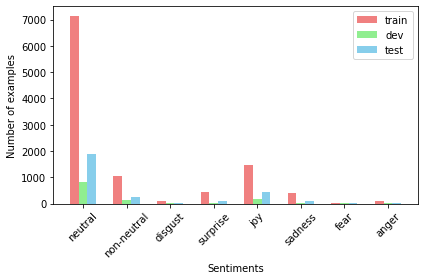

In [52]:
x = np.arange(len(emotions))
print(x)

ax = plt.subplot(111)
ax.bar(x-0.2, [len(emotions_corpus_dict[emotion]) for emotion in emotions_corpus_dict], width=0.2, color='lightcoral', label='train')
ax.bar(x, [len(emotions_corpus_dict_dev[emotion]) for emotion in emotions_corpus_dict], width=0.2, color='lightgreen', label='dev')
ax.bar(x+0.2, [len(emotions_corpus_dict_test[emotion]) for emotion in emotions_corpus_dict], width=0.2, color='skyblue', label='test')
ax.set_xticklabels(['0', 'neutral','non-neutral','disgust','surprise','joy','sadness','fear','anger'], rotation=45)
ax.legend()

plt.ylabel('Number of examples')
plt.xlabel('Sentiments')

plt.tight_layout()

plt.savefig("balancing_emotionpush.jpeg", dpi=300)

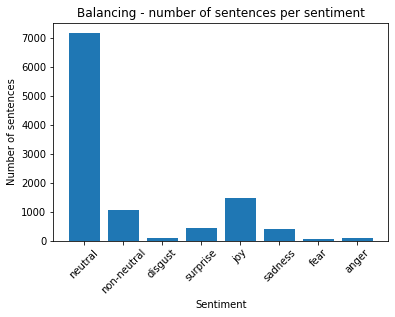

In [11]:
plt.bar(emotions, [len(emotions_corpus_dict[emotion]) for emotion in emotions_corpus_dict])
plt.xticks(rotation=45)
plt.title("Balancing - number of sentences per sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of sentences")
plt.savefig("balancing_emotionpush.jpeg", dpi=300)

### Remove Contractions

In [10]:
import warnings
warnings.filterwarnings('ignore')

for emotion in tqdm(emotions):
    emotion_sentences = emotions_corpus_dict[emotion]
    
    emotions_corpus_dict[emotion] = list(cont.expand_texts(emotion_sentences))

  0%|                                                                                                                                                  | 0/8 [00:00<?, ?it/s]At least one of the documents had no words that were in the vocabulary.
At least one of the documents had no words that were in the vocabulary.
At least one of the documents had no words that were in the vocabulary.
At least one of the documents had no words that were in the vocabulary.
At least one of the documents had no words that were in the vocabulary.
At least one of the documents had no words that were in the vocabulary.
At least one of the documents had no words that were in the vocabulary.
At least one of the documents had no words that were in the vocabulary.
At least one of the documents had no words that were in the vocabulary.
At least one of the documents had no words that were in the vocabulary.
At least one of the documents had no words that were in the vocabulary.
At least one of the documents had n

In [11]:
emotions_corpus_dict['neutral'][:5]

['Sorry to bother you but do you have the 270 textbook?',
 'what is it called',
 'Digital design and principles I think',
 'I do not think so?',
 'I could be wrong']

### Simple Term Frequency

In [16]:
vectorizer = CountVectorizer(analyzer='word', ngram_range=(1,3), stop_words='english')

vocabulary_tf_sorted = {}

for emotion in tqdm(emotions, desc="emotion"):
    # returns document x term matrix
    X = vectorizer.fit_transform(emotions_corpus_dict[emotion])
    
    tf_corpus = []
    
    term_doc_matrix = X.T
    
    for term_count in term_doc_matrix:
        tf_corpus.append(np.sum(term_count))
      
    vocabulary_tf = zip(vectorizer.get_feature_names(), tf_corpus)
    
    vocabulary_tf_reduced = [(word, tf) for (word, tf) in vocabulary_tf]# if tf > 2]
    
    vocabulary_tf_sorted[emotion] = sorted(vocabulary_tf_reduced, key = lambda x: x[1], reverse=True)

emotion: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.63it/s]


#### Create file

In [17]:
representative_words_file = {}

for emotion in vocabulary_tf_sorted:
    representative_words_file[emotion] = []
    
    representative_words = vocabulary_tf_sorted[emotion][:40]
    for word in representative_words:
        representative_words_file[emotion].append(word[0])
        
with open(os.path.join(save_location, f"TF_2_3.json"), 'w') as outfile:
    json.dump(representative_words_file, outfile)

In [27]:
lexical_overlap_file = {}
count_limit = 3

for emotion in vocabulary_tf_sorted:
    lexical_overlap_file[emotion] = []
    
    representative_words = [word for (word, count) in vocabulary_tf_sorted[emotion] if count > count_limit]
    lexical_overlap_file[emotion].append(representative_words)
    
lexical_overlap_file['fear']

[['just', 'like', 'oh', 'scared']]

### Most relevant words per sentiment but removing common words between sentiments.

In [15]:
# main_list = np.setdiff1d(list_2,list_1)
# yields the elements in `list_2` that are NOT in `list_1`
unique_words_per_sentiment = {}

for i, emotion1 in tqdm(enumerate(vocabulary_tf_sorted), desc="emotion"):
    list_emotion1 = [word for (word, tf) in vocabulary_tf_sorted[emotion1][:50]]
    list_emotions = []
    
    for j, emotion2 in tqdm(enumerate(vocabulary_tf_sorted)):
        if emotion1 == emotion2: continue

        list_emotions.extend(vocabulary_tf_sorted[emotion2])
        
    unique_words_per_sentiment[emotion1] = list(np.setdiff1d(list_emotion1, list_emotions))

    
with open(os.path.join(save_location, f"bad_words.json"), 'w') as outfile:
    json.dump(unique_words_per_sentiment, outfile)

emotion: 0it [00:00, ?it/s]
8it [00:00, 24314.81it/s]

8it [00:00, 17233.91it/s]
emotion: 2it [00:00,  8.13it/s]
8it [00:00, 24018.92it/s]
emotion: 3it [00:00,  6.67it/s]
8it [00:00, 24836.74it/s]
emotion: 4it [00:00,  6.06it/s]
8it [00:00, 24690.53it/s]
emotion: 5it [00:00,  6.01it/s]
8it [00:00, 22399.49it/s]
emotion: 6it [00:00,  6.67it/s]
8it [00:00, 25003.30it/s]
emotion: 7it [00:01,  6.02it/s]
8it [00:00, 20610.83it/s]
emotion: 8it [00:01,  6.11it/s]


### TF-IDF

**Idea**: The sentences of a single sentiment will belong to a unique document. We will rank each token of the document when compared to the full corpus.

**Note**: Each document will be a string with all sentences belonging to a single sentiment. 

In [28]:
corpus_by_emotion = []

for emotion in tqdm(emotions, desc="emotion"): 
    corpus = ""
    
    # select examples of the corpus that are labelled with the specific sentiment 
    emotion_df = df[df['emotion'] == emotion]
    emotion_corpus = emotion_df['utterance'].values
    
    # preprocessing + building string corpus
    for sentence in tqdm(emotion_corpus, desc="sentence"):
        corpus += data_analysis.preprocessing(sentence, lower=True, punct=True) + " "
        
    corpus_by_emotion.append(corpus)

sentence: 100%|██████████| 7148/7148 [00:00<00:00, 403163.96it/s]

sentence: 100%|██████████| 1064/1064 [00:00<00:00, 395703.09it/s]

sentence: 100%|██████████| 85/85 [00:00<00:00, 294154.98it/s]

sentence: 100%|██████████| 435/435 [00:00<00:00, 329039.18it/s]

sentence: 100%|██████████| 1482/1482 [00:00<00:00, 304629.19it/s]

sentence: 100%|██████████| 389/389 [00:00<00:00, 186296.44it/s]

sentence: 100%|██████████| 36/36 [00:00<00:00, 91623.15it/s]

emotion: 100%|██████████| 8/8 [00:00<00:00, 110.37it/s]


In [30]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), analyzer="word", sublinear_tf=True)

tfidf_vectorspace = tfidf_vectorizer.fit_transform(corpus_by_emotion)

In [31]:
# matrix: emotion x tokens
tfidf_vectorspace.shape

(8, 46174)

In [34]:
lexical_overlap_file = {}
count_limit = 3

feature_array = np.array(tfidf_vectorizer.get_feature_names())
print(feature_array)

for i, tfidf_scores in tqdm(enumerate(tfidf_vectorspace)):
    tfidf_sorting = np.argsort(tfidf_scores.toarray()).flatten()[::-1]
    top_n = feature_array[tfidf_sorting]
    
    lexical_overlap_file[emotions[i]] = list(top_n)  
    
#lexical_overlap_file['fear']

3it [00:00, 26.23it/s]

['01' '01 01' '01 ok' ... 'zzz okay' '烤肉ed' '烤肉ed in']


8it [00:00, 26.55it/s]


From this vectorspace we want to find the top n most relevant tokens per sentiment, i.e., sort each line in the vectorspace and retrieve the top n.

In [35]:
emotions_lexicon = {}

n = 40

feature_array = np.array(tfidf_vectorizer.get_feature_names())

for i, tfidf_scores in tqdm(enumerate(tfidf_vectorspace)):
    tfidf_sorting = np.argsort(tfidf_scores.toarray()).flatten()[::-1]
    top_n = feature_array[tfidf_sorting][:n]
    
    emotions_lexicon[emotions[i]] = list(top_n)    

8it [00:00, 55.19it/s]


In [36]:
with open(os.path.join(save_location, f"TF_IDF_2_3.json"), 'w') as outfile:
    json.dump(emotions_lexicon, outfile)